In [9]:
import pandas as pd
import numpy as np

In [7]:
# with open('Reference_class_dataset.tsv','w') as fp:
#     fp.write('')

In [32]:
df=pd.read_csv('Reference_class_dataset.csv')
print(df['Types'].unique())
df.describe()

['TRADITIONAL REF' 'NON TRADITIONAL REF']


,FileName,Reference,Types
count,573,573,573
unique,114,573,2
top,NU8SU001C,"Internet: ""Huzurevindeki Yashlara Virus Bulast...",TRADITIONAL REF
freq,100,1,288


In [33]:
df['Types'].value_counts()

TRADITIONAL REF        288
NON TRADITIONAL REF    285
Name: Types, dtype: int64

In [34]:
df

,FileName,Reference,Types
0,NE9KL000C,"Burmeister, L.C., Convective Heat Transfer, Ne...",TRADITIONAL REF
1,NE9KL000C,"Heislbetz, B., Madlener, K., and Ciezki, H., B...",TRADITIONAL REF
2,NE9KL000C,"Hinze, J.O., Turbulence, New York, NY: McGraw-...",TRADITIONAL REF
3,NE9KL000C,"Jyoti, B.V.S. and Baek, S.W., Rheological Char...",TRADITIONAL REF
4,NE9KL000C,"Modekurti, A., Numerical Investigation of Flui...",TRADITIONAL REF
...,...,...,...
568,NV0ZJ000C,Simmonds EJ MacLennan DN Fisheries Acoustics: ...,TRADITIONAL REF
569,NV0ZJ000C,R Core Team.: R: A Language and Environment fo...,TRADITIONAL REF
570,NV0ZJ000C,"Frossard, V., Barbier, C., Goulon, C., Guillar...",TRADITIONAL REF
571,NV0ZJ000C,Guintard C Salaud C Richaudeau Y Tavernier C D...,TRADITIONAL REF


In [35]:
df.columns

Index(['FileName', 'Reference', 'Types'], dtype='object')

In [36]:
df['Reference']

0      Burmeister, L.C., Convective Heat Transfer, Ne...
1      Heislbetz, B., Madlener, K., and Ciezki, H., B...
2      Hinze, J.O., Turbulence, New York, NY: McGraw-...
3      Jyoti, B.V.S. and Baek, S.W., Rheological Char...
4      Modekurti, A., Numerical Investigation of Flui...
                             ...                        
568    Simmonds EJ MacLennan DN Fisheries Acoustics: ...
569    R Core Team.: R: A Language and Environment fo...
570    Frossard, V., Barbier, C., Goulon, C., Guillar...
571    Guintard C Salaud C Richaudeau Y Tavernier C D...
572    Nakken O Olsen K Target Strength Measurements ...
Name: Reference, Length: 573, dtype: object

In [39]:
for i in df['Reference']:
    if(i[0]==' '):
        print(i)

In [40]:
df

,FileName,Reference,Types
0,NE9KL000C,"Burmeister, L.C., Convective Heat Transfer, Ne...",TRADITIONAL REF
1,NE9KL000C,"Heislbetz, B., Madlener, K., and Ciezki, H., B...",TRADITIONAL REF
2,NE9KL000C,"Hinze, J.O., Turbulence, New York, NY: McGraw-...",TRADITIONAL REF
3,NE9KL000C,"Jyoti, B.V.S. and Baek, S.W., Rheological Char...",TRADITIONAL REF
4,NE9KL000C,"Modekurti, A., Numerical Investigation of Flui...",TRADITIONAL REF
...,...,...,...
568,NV0ZJ000C,Simmonds EJ MacLennan DN Fisheries Acoustics: ...,TRADITIONAL REF
569,NV0ZJ000C,R Core Team.: R: A Language and Environment fo...,TRADITIONAL REF
570,NV0ZJ000C,"Frossard, V., Barbier, C., Goulon, C., Guillar...",TRADITIONAL REF
571,NV0ZJ000C,Guintard C Salaud C Richaudeau Y Tavernier C D...,TRADITIONAL REF


In [41]:
c=0
for i in df['Reference']:
    if(i[0]==' '):
        print(i)
        c+=1
print(c)

0


# _________________CLASSIFICATION SPACY _________________

In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aaditya
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [43]:
df = pd.read_csv('Reference_class_dataset.csv')
df.head()

,FileName,Reference,Types
0,NE9KL000C,"Burmeister, L.C., Convective Heat Transfer, Ne...",TRADITIONAL REF
1,NE9KL000C,"Heislbetz, B., Madlener, K., and Ciezki, H., B...",TRADITIONAL REF
2,NE9KL000C,"Hinze, J.O., Turbulence, New York, NY: McGraw-...",TRADITIONAL REF
3,NE9KL000C,"Jyoti, B.V.S. and Baek, S.W., Rheological Char...",TRADITIONAL REF
4,NE9KL000C,"Modekurti, A., Numerical Investigation of Flui...",TRADITIONAL REF


In [55]:
data=df[['Reference','Types']]

In [57]:
data
data.isnull().sum()

Reference    0
Types        0
dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30, random_state=42)
print('Reference sample:', train['Reference'].iloc[0])
print('Type of this Reference:', train['Types'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Reference sample: Bugzilla (2019) (Accessed October 2019) https://www.bugzilla.org/ 
Type of this Reference: NON TRADITIONAL REF
Training Data Shape: (401, 2)
Testing Data Shape: (172, 2)


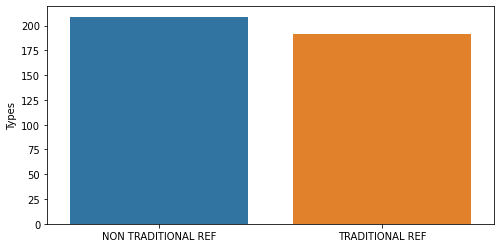

In [67]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['Types'].unique(), y=train['Types'].value_counts())
plt.show()

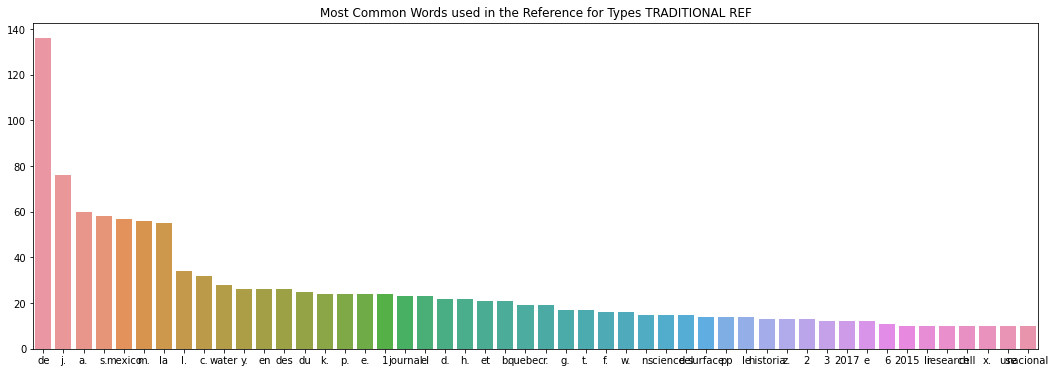

In [71]:
import spacy
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)
INFO_text = [text for text in train[train['Types'] == 'TRADITIONAL REF']['Reference']]
IS_text = [text for text in train[train['Types'] == 'NON TRADITIONAL REF']['Reference']]
INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()
IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()
INFO_counts = Counter(INFO_clean)
IS_counts = Counter(IS_clean)
INFO_common_words = [word[0] for word in INFO_counts.most_common(50)]
INFO_common_counts = [word[1] for word in INFO_counts.most_common(50)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in the Reference for Types TRADITIONAL REF')
plt.show()

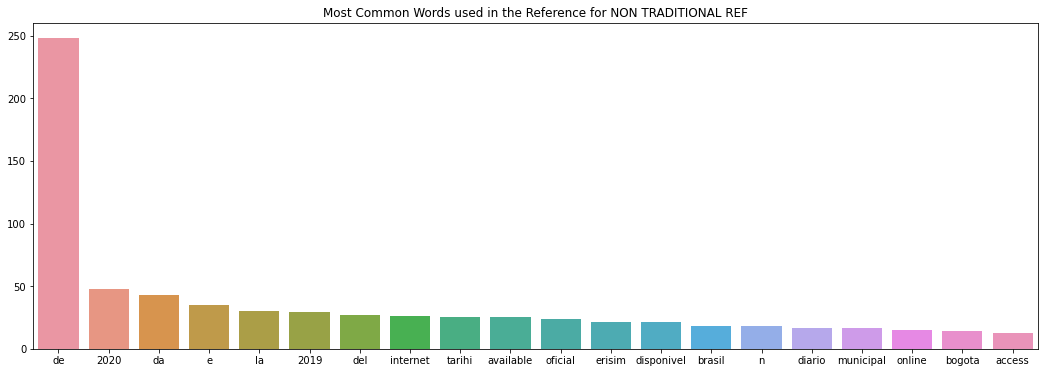

In [72]:
IS_common_words = [word[0] for word in IS_counts.most_common(20)]
IS_common_counts = [word[1] for word in IS_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=IS_common_words, y=IS_common_counts)
plt.title('Most Common Words used in the Reference for NON TRADITIONAL REF')
plt.show()

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()

In [77]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [115]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LinearSVC()

pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])
# data
train1 = train['Reference'].tolist()
labelsTrain1 = train['Types'].tolist()
test1 = test['Reference'].tolist()
labelsTest1 = test['Types'].tolist()
# train
pipe.fit(train1, labelsTrain1)
# test
# print(test1)
preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))
print("Top 10 features used to predict: ")

printNMostInformative(vectorizer, clf, 10)
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
transform = pipe.fit_transform(train1, labelsTrain1)
vocab = vectorizer.get_feature_names()
for i in range(len(train1)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

accuracy: 0.8313953488372093
Top 10 features used to predict: 
Class 1 best: 
(-0.24990500495417708, '2020')
(-0.22948487173858131, 'archivo')
(-0.21147383469259817, 'harjunmaa')
(-0.21147383469259817, 'kun')
(-0.21147383469259817, 'pe')
(-0.21147383469259817, 'r')
(-0.21147383469259817, 'savage')
(-0.20961131180750542, 'https://www.netgear.com/')
(-0.2096111860953981, 'https://www.netguardstore.com/')
(-0.20961118509099178, 'https://inilabs.com/products/pushbot/.')
Class 2 best: 
(0.6043005715274684, 'j.')
(0.5255948874715173, 'mexico')
(0.3210836313883146, 'l.')
(0.3201361621711989, 'water')
(0.31358623217529297, 's.')
(0.2939744126860353, 'a.')
(0.2888696642281095, 'p.')
(0.276492964180344, 'cicadellidae')
(0.27446715120307136, '')
(0.26867874366839967, 'giarno')


In [80]:
from sklearn import metrics
print(metrics.classification_report(labelsTest1, preds, 
                                    target_names=df['Types'].unique()))

                     precision    recall  f1-score   support

    TRADITIONAL REF       0.75      0.93      0.83        76
NON TRADITIONAL REF       0.94      0.75      0.83        96

           accuracy                           0.83       172
          macro avg       0.84      0.84      0.83       172
       weighted avg       0.85      0.83      0.83       172

